<a href="https://colab.research.google.com/github/itzwow/ECE715_ML/blob/main/Assignments/Assignment1_prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 2
#### To apply KNN for "Social_Network_Ads" Dataset

### **Note** :
 Upload the Social_Network_Ads.csv file to the drive before loading


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('sample_data/Social_Network_Ads.csv') #reading csv

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape

(400, 5)

In [6]:
X = df.drop(columns=['Purchased']) #dropping the target column

In [7]:
X.head()

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000


In [9]:
#target column into Y
Y = df['Purchased'].values
Y[0:10] # First 10 target values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

## **Spliting Dataset**
We are splitting the dataset into 75:25 - Train:Test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#spliting dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state = 1, stratify=Y)

In [12]:
X_train.head()

,User ID,Gender,Age,EstimatedSalary
262,15672821,Female,55,125000
317,15684861,Male,35,55000
26,15792818,Male,49,28000
33,15776733,Female,28,44000
361,15778830,Female,53,34000


In [14]:
print(X_train.shape)

(300, 4)


In [15]:
Y_train
print(Y_train.shape)

(300,)


In [16]:
X_test.head()

,User ID,Gender,Age,EstimatedSalary
153,15619087,Female,36,50000
163,15757837,Male,35,38000
182,15694288,Female,32,117000
377,15800215,Female,42,53000
245,15722061,Female,51,146000


In [17]:
X_test.shape

(100, 4)

In [19]:
Y_test.shape

(100,)

In [40]:
Y_train

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [39]:
Y_test

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Standardizing the data

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [23]:
X_train.head()

,User ID,Gender,Age,EstimatedSalary
262,15672821,Female,55,125000
317,15684861,Male,35,55000
26,15792818,Male,49,28000
33,15776733,Female,28,44000
361,15778830,Female,53,34000


We are neglecting the Gender and the UserId column as Age and Estimated Salary are more important features compared to the former one.

In [24]:
# data_encoded = pd.get_dummies(X_train, columns=['Gender'], drop_first=True)
X_train.drop(columns=['Gender', 'User ID'], inplace=True)

In [25]:
X_test.drop(columns=['Gender', 'User ID'], inplace=True)

In [26]:
X_train[0:5]

,Age,EstimatedSalary
262,55,125000
317,35,55000
26,49,28000
33,28,44000
361,53,34000


In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [43]:
X_train[0:10]

array([[ 1.62866988,  1.69584124],
       [-0.2592782 , -0.41980458],
       [ 1.06228545, -1.23583939],
       [-0.92006003, -0.7522632 ],
       [ 1.43987507, -1.05449832],
       [-0.63686782, -0.32913404],
       [-0.73126522,  1.42382963],
       [ 0.96788805, -1.17539237],
       [-0.2592782 , -0.57092213],
       [-1.76963667,  0.48690077]])

In [44]:
X_test[0:10]

array([[-0.13684471, -0.60786415],
       [-0.23600754, -0.93496594],
       [-0.53349603,  1.21845416],
       [ 0.45813228, -0.52608871],
       [ 1.35059776,  2.00895014],
       [-0.03768188, -0.06269451],
       [-0.03768188, -0.00817754],
       [-0.23600754, -0.19898692],
       [-0.83098453,  0.29166576],
       [ 0.35896945, -0.55334719]])

**Applying KNN**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)

In [30]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [31]:
Y_pred = knn.predict(X_test)

In [32]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
# Display the confusion matrix
cm

array([[57,  7],
       [ 6, 30]])

In [34]:
#checking accuracy score
# knn.score(X_test, Y_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.87


In [46]:
knn.score(X_test, Y_test)

0.87

## Visualizing the Decision Boundary for Train and Test set

<ipython-input-36-bf183a33ce50>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


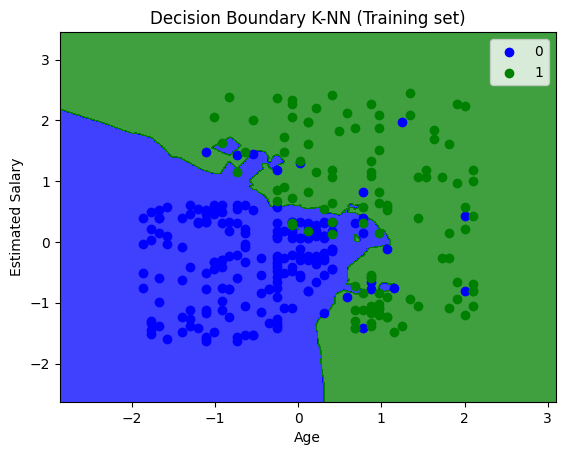

In [36]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('Decision Boundary K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-37-522bacb52060>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


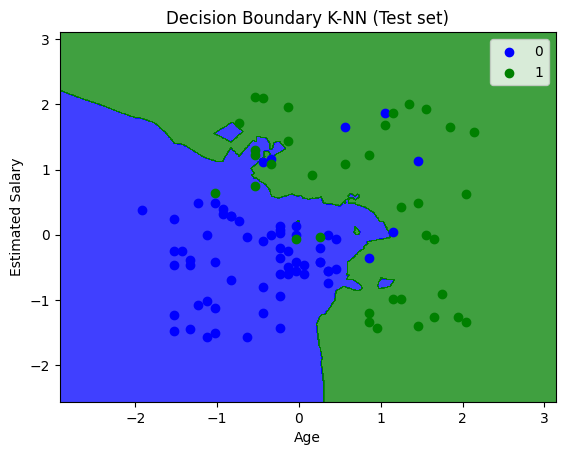

In [37]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('Decision Boundary K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()